<a href="https://colab.research.google.com/github/gyuholee94/NLP/blob/master/%EC%BD%94%EB%A1%9C%EB%82%98_%ED%99%95%EC%A7%84_%EC%97%B0%EB%A0%B9%EB%B3%84_%EB%AF%BC%EA%B0%90%EB%8F%84_%EA%B5%AC%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 전처리

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from dbfread import DBF
# from haversine import haversine
from tqdm.notebook import tqdm
%matplotlib inline
import platform
import pickle
import re
platform.system()
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
%config InlineBackend.figure_format = 'retina'
!pip install dbfread
!pip install haversine

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AH9mixWNcALPpjnMeJC0i23GwPSbqYWDFL84vwdqIa_NVL3oluuDKU
Mounted at /content/drive


## SKT API 서울시 구별 성별 연령별 일자별 시간별 유동인구

In [ ]:
# time01 = pd.read_csv('./Floating_Population_2001.csv')
# time01

,일자,시간(1시간단위),연령대(10세단위),성별,시,군구,유동인구수
0,20200101,0,70,여성,서울,중구,7910
1,20200101,1,20,여성,서울,중구,12330
2,20200101,1,40,여성,서울,구로구,34400
3,20200101,1,40,여성,서울,서대문구,24400
4,20200101,1,50,여성,서울,구로구,36590
...,...,...,...,...,...,...,...
223195,20200131,23,30,남성,서울,동대문구,27600
223196,20200131,23,50,여성,서울,양천구,38680
223197,20200131,23,70,남성,서울,영등포구,14790
223198,20200131,23,70,여성,서울,서초구,16990


In [ ]:
# time01 = pd.read_csv('./Floating_Population_2001.csv')
# time02 = pd.read_csv('./Floating_Population_2002.csv')
# time03 = pd.read_csv('./Floating_Population_2003.csv')
# time04 = pd.read_csv('./Floating_Population_2004.csv')
# time05 = pd.read_csv('./Floating_Population_2005.csv')
# time06 = pd.read_csv('./Floating_Population_2006.csv')
# time07 = pd.read_csv('./Floating_Population_2007.csv')

In [ ]:
# time = pd.concat([time01, time02, time03, time04, time05, time06, time07])
# time

,일자,시간(1시간단위),연령대(10세단위),성별,시,군구,유동인구수
0,20200101,0,70,여성,서울,중구,7910
1,20200101,1,20,여성,서울,중구,12330
2,20200101,1,40,여성,서울,구로구,34400
3,20200101,1,40,여성,서울,서대문구,24400
4,20200101,1,50,여성,서울,구로구,36590
...,...,...,...,...,...,...,...
223195,20200731,22,20,여성,서울,구로구,29360
223196,20200731,22,20,여성,서울,성북구,32900
223197,20200731,22,30,남성,서울,강동구,34010
223198,20200731,23,30,여성,서울,서대문구,21960


In [ ]:
# #시는 다 서울이라 필요없다.
# del time['시']

In [ ]:
# time.columns = ['date', 'time', 'age', 'sex', 'gu' , 'ppl']

In [ ]:
# time

,date,time,age,sex,gu,ppl
0,20200101,0,70,여성,중구,7910
1,20200101,1,20,여성,중구,12330
2,20200101,1,40,여성,구로구,34400
3,20200101,1,40,여성,서대문구,24400
4,20200101,1,50,여성,구로구,36590
...,...,...,...,...,...,...
223195,20200731,22,20,여성,구로구,29360
223196,20200731,22,20,여성,성북구,32900
223197,20200731,22,30,남성,강동구,34010
223198,20200731,23,30,여성,서대문구,21960


In [ ]:
# time['datetime'] = time['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
# time
                                                           

,date,time,age,sex,gu,ppl,datetime
0,20200101,0,70,여성,중구,7910,2020-01-01
1,20200101,1,20,여성,중구,12330,2020-01-01
2,20200101,1,40,여성,구로구,34400,2020-01-01
3,20200101,1,40,여성,서대문구,24400,2020-01-01
4,20200101,1,50,여성,구로구,36590,2020-01-01
...,...,...,...,...,...,...,...
223195,20200731,22,20,여성,구로구,29360,2020-07-31
223196,20200731,22,20,여성,성북구,32900,2020-07-31
223197,20200731,22,30,남성,강동구,34010,2020-07-31
223198,20200731,23,30,여성,서대문구,21960,2020-07-31


In [ ]:
# time = time[['datetime', 'date', 'time', 'gu', 'age', 'ppl', 'sex']]
# time

,datetime,date,time,gu,age,ppl,sex
0,2020-01-01,20200101,0,중구,70,7910,여성
1,2020-01-01,20200101,1,중구,20,12330,여성
2,2020-01-01,20200101,1,구로구,40,34400,여성
3,2020-01-01,20200101,1,서대문구,40,24400,여성
4,2020-01-01,20200101,1,구로구,50,36590,여성
...,...,...,...,...,...,...,...
223195,2020-07-31,20200731,22,구로구,20,29360,여성
223196,2020-07-31,20200731,22,성북구,20,32900,여성
223197,2020-07-31,20200731,22,강동구,30,34010,남성
223198,2020-07-31,20200731,23,서대문구,30,21960,여성


In [ ]:
# #저장
# with open('time.pkl', 'wb') as f:
#     pickle.dump(time, f)

In [4]:
def pklopen(route):
    with open('{}'.format(route), 'rb') as f:
        df = pickle.load(f)
    return df
time = pklopen('/content/drive/My Drive/2020빅콘테스트 문제데이터(혁신아이디어분야)/주피터 업로드/time.pkl')

In [5]:
#구의 종류
time['gu'].unique()

array(['중구', '구로구', '서대문구', '성동구', '송파구', '용산구', '성북구', '영등포구', '동작구',
       '중랑구', '노원구', '양천구', '강남구', '강서구', '관악구', '강동구', '은평구', '마포구',
       '도봉구', '종로구', '서초구', '동대문구', '강북구', '광진구', '금천구'], dtype=object)

In [6]:
#나이 종류
time['age'].unique()

array([70, 20, 40, 50, 30, 60])

In [7]:
time_sorted = time.sort_values(by=['age', 'datetime', 'time'], axis=0)
time_sorted

,datetime,date,time,gu,age,ppl,sex
4109,2020-01-01,20200101,0,금천구,20,14220,여성
6151,2020-01-01,20200101,0,중랑구,20,25030,남성
10330,2020-01-01,20200101,0,강남구,20,43680,남성
24665,2020-01-01,20200101,0,도봉구,20,19950,남성
30655,2020-01-01,20200101,0,양천구,20,29620,남성
...,...,...,...,...,...,...,...
195866,2020-07-31,20200731,23,성동구,70,13530,여성
199770,2020-07-31,20200731,23,금천구,70,10740,여성
221273,2020-07-31,20200731,23,노원구,70,16500,남성
221274,2020-07-31,20200731,23,중랑구,70,13350,남성


In [8]:
time_sorted.set_index(['datetime', 'time'])

date   gu  age    ppl sex
datetime   time                               
2020-01-01 0     20200101  금천구   20  14220  여성
           0     20200101  중랑구   20  25030  남성
           0     20200101  강남구   20  43680  남성
           0     20200101  도봉구   20  19950  남성
           0     20200101  양천구   20  29620  남성
...                   ...  ...  ...    ...  ..
2020-07-31 23    20200731  성동구   70  13530  여성
           23    20200731  금천구   70  10740  여성
           23    20200731  노원구   70  16500  남성
           23    20200731  중랑구   70  13350  남성
           23    20200731  마포구   70  17770  여성

[1524000 rows x 5 columns]

## 구별, 일별, 시간별 같은 연령끼리 유동인구

In [9]:
timeday = time_sorted.groupby(['datetime', 'date', 'gu', 'age', 'time']).sum()
timeday = timeday.reset_index()
#2월 1일 기준 20대 한번 보자(1월은 명절)
k = timeday[timeday['datetime']=='2020-02-01'].head(24)
k

,datetime,date,gu,age,time,ppl
111600,2020-02-01,20200201,강남구,20,0,85360
111601,2020-02-01,20200201,강남구,20,1,83380
111602,2020-02-01,20200201,강남구,20,2,81670
111603,2020-02-01,20200201,강남구,20,3,80830
111604,2020-02-01,20200201,강남구,20,4,80150
111605,2020-02-01,20200201,강남구,20,5,79960
111606,2020-02-01,20200201,강남구,20,6,80830
111607,2020-02-01,20200201,강남구,20,7,83890
111608,2020-02-01,20200201,강남구,20,8,92110
111609,2020-02-01,20200201,강남구,20,9,104370


Text(0.5, 1.0, '2월1일 강남구 20대의 시간별 유동인구')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_

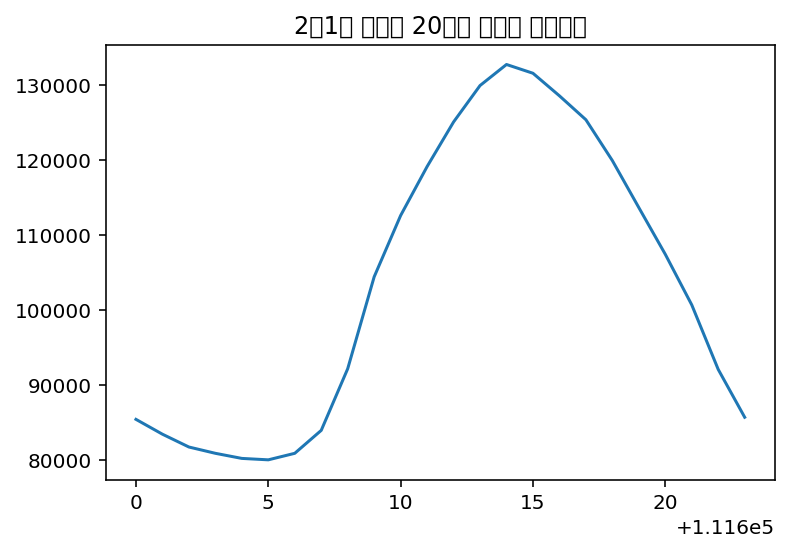

In [10]:
plt.plot(k['ppl'])
plt.title('2월1일 강남구 20대의 시간별 유동인구')

## 이제 구별 일별 민감도(연령별은 나중에 추가하기)

In [39]:
timegu = time_sorted.groupby(['datetime', 'date','gu']).sum()
timegu = timegu.reset_index()
del timegu['age']
del timegu['time']
del timegu['date']
# timegu.set_index(['d'], inplace=True)
timegu

,datetime,gu,ppl
0,2020-01-01,강남구,11001340
1,2020-01-01,강동구,8296230
2,2020-01-01,강북구,6160610
3,2020-01-01,강서구,10998410
4,2020-01-01,관악구,10003990
...,...,...,...
5295,2020-07-31,용산구,5271470
5296,2020-07-31,은평구,7699220
5297,2020-07-31,종로구,5752320
5298,2020-07-31,중구,6066250


In [37]:
weekly_timegu = timegu.resample('W-Sun').sum()

TypeError: ignored

In [38]:
timegu

,datetime,ppl
gu,,
강남구,2020-01-01,11001340
강동구,2020-01-01,8296230
강북구,2020-01-01,6160610
강서구,2020-01-01,10998410
관악구,2020-01-01,10003990
...,...,...
용산구,2020-07-31,5271470
은평구,2020-07-31,7699220
종로구,2020-07-31,5752320
